## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ../data/

"wget" non Š riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline 

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [2]:
# 1
file_name="/Users/tommy/data/data_000637.txt"
data=pd.read_csv(file_name)#,nrows=100000)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


2\. Find out the number of BX in a ORBIT (the value 'x').

In [3]:
# 2
x = data['BX_COUNTER'].max()+1
print("Number of BX in a ORBIT:",x)

Number of BX in a ORBIT: 3564


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [4]:
# 3
t0 = data['ORBIT_CNT'].iloc[0]*x*25 + data['BX_COUNTER'].iloc[0]*25 + data['TDC_MEAS'].iloc[0]*(25/30)
tf = data['ORBIT_CNT'].iloc[-1]*x*25 + data['BX_COUNTER'].iloc[-1]*25 + data['TDC_MEAS'].iloc[-1]*(25/30)

tot_time = tf - t0

print("The data taking lasted {} ns".format(tot_time))

The data taking lasted 980416093.3125 ns


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [5]:
# 4
data['ABSOLUTE_TIME'] = data['ORBIT_CNT']*x*25 + data['BX_COUNTER']*25 + data['TDC_MEAS']*(25/30)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE_TIME
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,1,0,139,3869211171,769,0,3.447467e+14


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [6]:
# 5
data['HEAD'] = np.random.randint(0,2, size=len(data['HEAD']))
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE_TIME
0,1,0,123,3869200167,2374,26,3.447457e+14
1,0,0,124,3869200167,2374,27,3.447457e+14
2,0,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,0,0,64,3869211171,764,0,3.447467e+14
1310718,0,0,139,3869211171,769,0,3.447467e+14


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [7]:
# 6
newData = data[data['HEAD']==1]
newData

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE_TIME
0,1,0,123,3869200167,2374,26,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
8,1,0,62,3869200167,2774,21,3.447457e+14
9,1,0,60,3869200167,2788,7,3.447457e+14
...,...,...,...,...,...,...,...
1310710,1,1,36,3869211171,427,13,3.447467e+14
1310711,1,1,39,3869211171,430,0,3.447467e+14
1310712,1,1,35,3869211171,429,4,3.447467e+14
1310715,1,0,62,3869211171,762,14,3.447467e+14


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

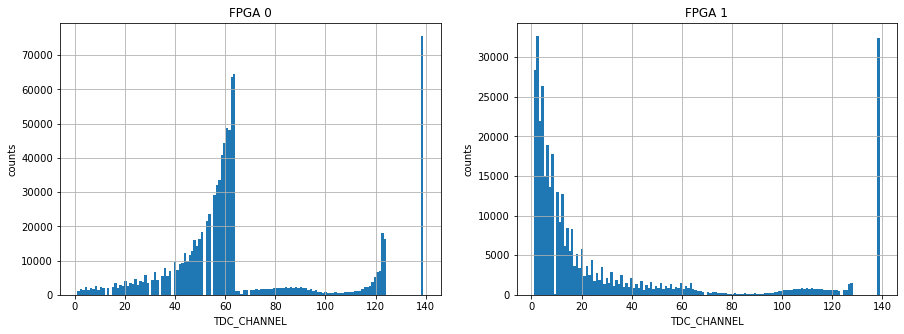

In [8]:
# 7
tdc_fpga0 = np.array(data[data['FPGA']==0]['TDC_CHANNEL'])
tdc_fpga1 = np.array(data[data['FPGA']==1]['TDC_CHANNEL'])

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].hist(tdc_fpga0, bins=140)
ax[0].set_xlabel('TDC_CHANNEL')
ax[0].set_ylabel('counts')
ax[0].set_title('FPGA 0')
ax[0].grid(True)

ax[1].hist(tdc_fpga1, bins=140)
ax[1].set_xlabel('TDC_CHANNEL')
ax[1].set_ylabel('counts')
ax[1].set_title('FPGA 1')
ax[1].grid(True)

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [50]:
# 8
data['TDC_COUNTS'] = 1
print("Top 3 TDC channels with most counts:")
data.groupby('TDC_CHANNEL').count()[['TDC_COUNTS']].sort_values(by='TDC_COUNTS', ascending=False)[:3]

Top 3 TDC channels with most counts:


,TDC_COUNTS
TDC_CHANNEL,
139,108059
64,66020
63,64642


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [68]:
# 9
nOrbits = len(pd.unique(data['ORBIT_CNT']))
print("There are {} unique orbits".format(nOrbits))

nOrbits139 = len(pd.unique(data[data['TDC_CHANNEL']==139]['ORBIT_CNT']))
print("There are {} unique orbits with at least one measurement from TDC_CHANNEL=139".format(nOrbits139))

There are 11001 unique orbits
There are 10976 unique orbits with at least one measurement from TDC_CHANNEL=139
